## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Relacione sus datos y los del compañero de trabajo

Michael Steven Ruiz Palacio
Emmanuel Valbuena 

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes 
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

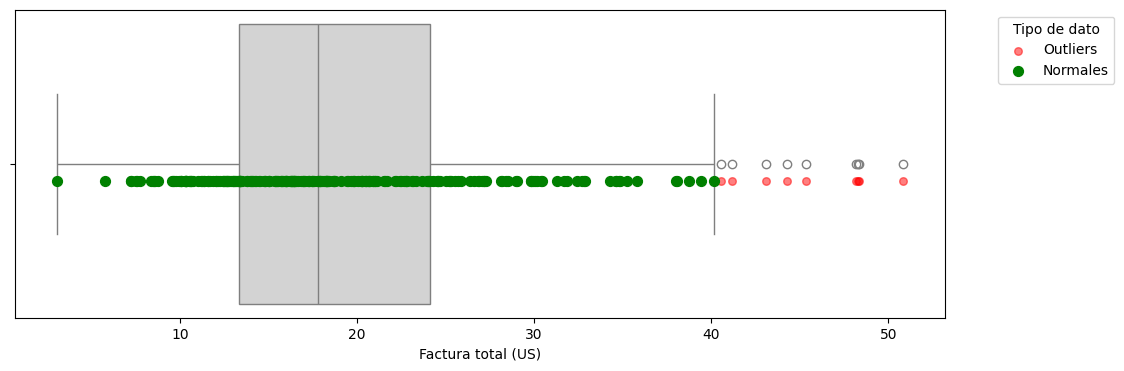

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")

sc_a = plt.scatter(data_a, [0.05]*len(data_a), color="red", s=30, alpha=0.5, label="Outliers")
sc_b = plt.scatter(data_b, [0.05]*len(data_b), color="green", s=50, zorder=5, label="Normales")

plt.xlabel("Factura total (US)")
plt.legend(title="Tipo de dato", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Se deben tener en cuenta los datos establecidos en la gráfica como "outliers", pueden brindar información sobre un grupo que no se tendría en cuenta desde un principio

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes 
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

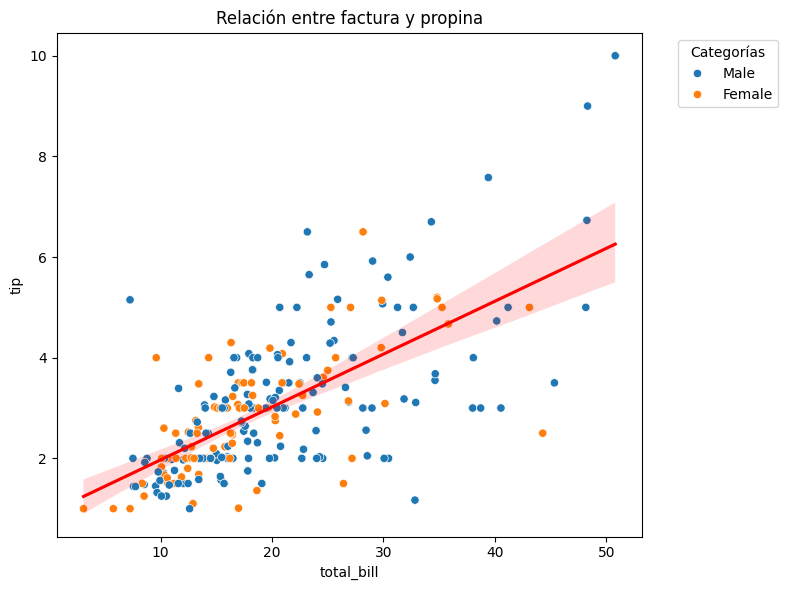

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tips,
    x="total_bill", 
    y="tip",
    hue="sex"
)

plt.xlabel("Factura total")
plt.ylabel("Propina")
plt.title("Relación entre factura y propina")
plt.legend(title="Categorías", bbox_to_anchor=(1.05, 1), loc="upper left")
sns.regplot(x="total_bill", y="tip", data=tips, scatter=False, color="red", label="Tendencia")
plt.tight_layout()
plt.show()


### Se observa una relación positiva: a mayor valor de la factura, mayor es la propina que se deja. Además, la tendencia general es similar entre hombres y mujeres, aunque la dispersión indica que el monto de la propina no depende únicamente del total de la factura, sino que existen otros factores que influyen en la variabilidad

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes 
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

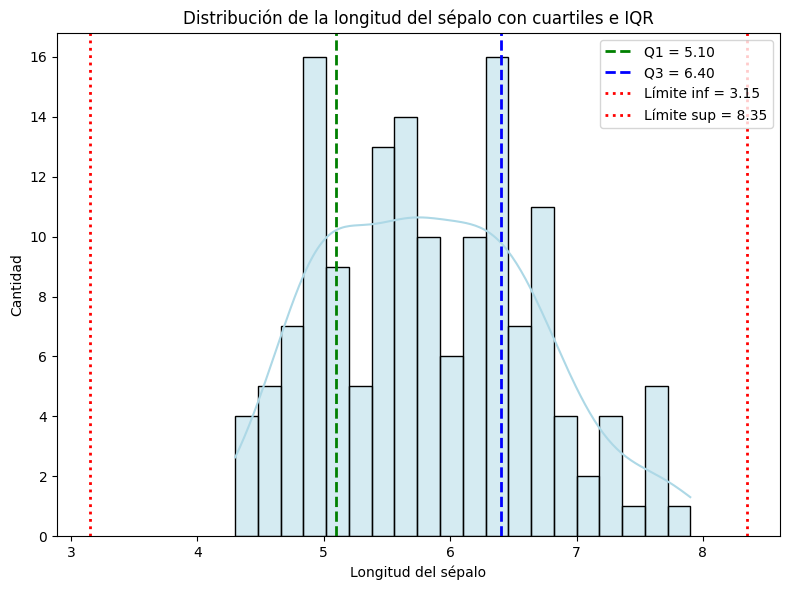

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
x = iris["sepal_length"].values

Q1, Q3 = np.percentile(x, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True, color="lightblue")

plt.axvline(Q1, color="green", linestyle="--", linewidth=2, label=f"Q1 = {Q1:.2f}")
plt.axvline(Q3, color="blue", linestyle="--", linewidth=2, label=f"Q3 = {Q3:.2f}")
plt.axvline(lim_inf, color="red", linestyle=":", linewidth=2, label=f"Límite inf = {lim_inf:.2f}")
plt.axvline(lim_sup, color="red", linestyle=":", linewidth=2, label=f"Límite sup = {lim_sup:.2f}")

plt.xlabel("Longitud del sépalo")
plt.ylabel("Cantidad")
plt.title("Distribución de la longitud del sépalo con cuartiles e IQR")
plt.legend()
plt.tight_layout()
plt.show()


### Esta gráfica nos muestra que el tamaño del sépalo de la flor iris es bastante consistente porque gráficamente y con el cálculo de IQR estándar se puede considerar que no tenemos datos atípicos

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes 
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

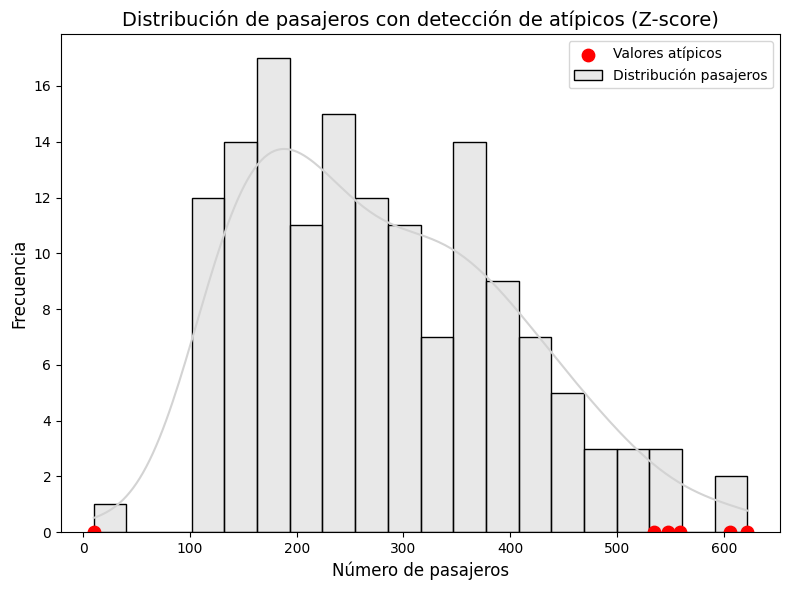

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values

# Agregar valores atípicos
x = np.append(x, [10, 500])

# Cálculo de z-score
z_scores = zscore(x)
data_b = np.abs(z_scores) > 2

# Gráfica
plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray", label="Distribución pasajeros")
plt.scatter(x[data_b], np.zeros_like(x[data_b]), 
            color="red", s=80, marker="o", label="Valores atípicos")

plt.xlabel("Número de pasajeros", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de pasajeros con detección de atípicos (Z-score)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


#### La gráfica permite visualizar fácilmente que la mayor parte de los datos se encontran en un rango cercano a la media, hay dato atípico evidente y hay valores inusualmente altos que no se asemejan al resto de datos

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes 
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

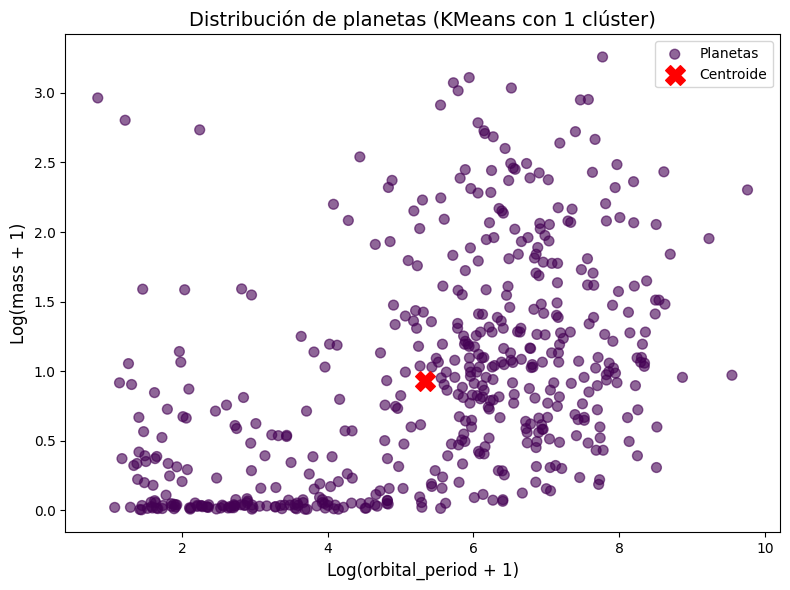

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Dataset y log-transformación
planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

# KMeans con 1 clúster
kmeans = KMeans(n_clusters=1, random_state=42).fit(X)
labels = kmeans.labels_
centroid = kmeans.cluster_centers_

# Gráfica
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50, alpha=0.6, label="Planetas")
plt.scatter(centroid[:,0], centroid[:,1], c="red", marker="X", s=200, label="Centroide")

plt.xlabel("Log(orbital_period + 1)", fontsize=12)
plt.ylabel("Log(mass + 1)", fontsize=12)
plt.title("Distribución de planetas (KMeans con 1 clúster)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


#### La mayoría de los planetas se concentran en un rango reducido de masa y período orbital tras aplicar la transformación logarítmica Con un solo clúster, el algoritmo KMeans calcula un centroide (rojo) que representa el promedio de todos los datos.

No se identifican subgrupos, porque forzamos a que todo pertenezca al mismo clúster.

Aun así, la distancia de los puntos al centroide da idea de la dispersión general.

Este análisis sugiere que sería más interesante usar más de un clúster para explorar posibles agrupaciones naturales en los datos.